##**Άσκηση 1 a)**

In [33]:
import numpy as np
import math
import matplotlib.pyplot as plt

#specify the file path
file_path = '/content/Data_ex1.txt'

#store data on an array
data = np.genfromtxt(file_path, delimiter=',')

class1_data = data[data[:, 2] == 1, :]
class2_data = data[data[:, 2] == 2, :]
class3_data = data[data[:, 2] == 3, :]

#implement parzen window as shown in course material
def parzen_window(data,h,x):
  a = (- np.sum((data - x)**2,axis = 1)/(2*h**2))
  b = np.zeros([data.shape[0]])
  for i in range(data.shape[0]):
    b[i] = (np.exp(a[i]) /(h*np.sqrt(2*np.pi)))/h**2

  px = np.sum(b)/data.shape[0]
  return px

In [34]:
def parzen_pdf_plot(c1,c2,c3,h):
  #create a grid
  x1_min, x1_max = data[:, 0].min() - 1, data[:, 0].max() + 1
  x2_min, x2_max = data[:, 1].min() - 1, data[:, 1].max() + 1
  xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, 0.1),np.arange(x2_min, x2_max, 0.1))

  #use parzen window to calculate pdf for every grid point for every class
  grid_predictions1 = np.zeros_like(xx1)
  grid_predictions2 = np.zeros_like(xx1)
  grid_predictions3 = np.zeros_like(xx1)
  for i in range(xx1.shape[0]):
      for j in range(xx1.shape[1]):
          point = np.array([xx1[i, j], xx2[i, j]])
          grid_predictions1[i, j] = parzen_window(c1[:, 0:2], h, point)
          grid_predictions2[i, j] = parzen_window(c2[:, 0:2], h, point)
          grid_predictions3[i, j] = parzen_window(c3[:, 0:2], h, point)

  #plot the pdfs
  fig = plt.figure()
  ax = fig.add_subplot(111, projection='3d')

  ax.plot_surface(xx1, xx2, grid_predictions1, cmap='Blues', alpha=0.5, label='Class 1')
  ax.plot_surface(xx1, xx2, grid_predictions2, cmap='Oranges', alpha=0.5, label='Class 2')
  ax.plot_surface(xx1, xx2, grid_predictions3, cmap='Greens', alpha=0.5, label='Class 3')

  ax.set_xlabel('X1')
  ax.set_ylabel('X2')
  ax.set_zlabel('PDF')
  ax.set_title(f'Probability Density Function calculation using Parzen Window for h = {h}')
  plt.show()

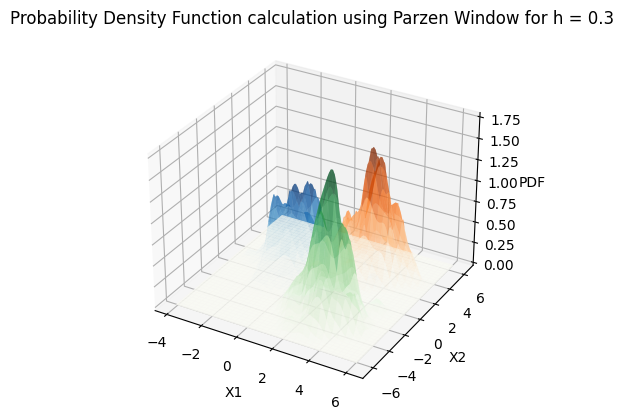

In [35]:
parzen_pdf_plot(class1_data,class2_data,class3_data,0.3)

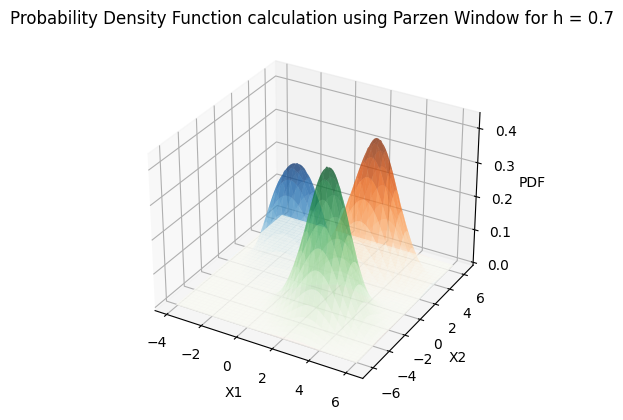

In [36]:
parzen_pdf_plot(class1_data,class2_data,class3_data,0.7)

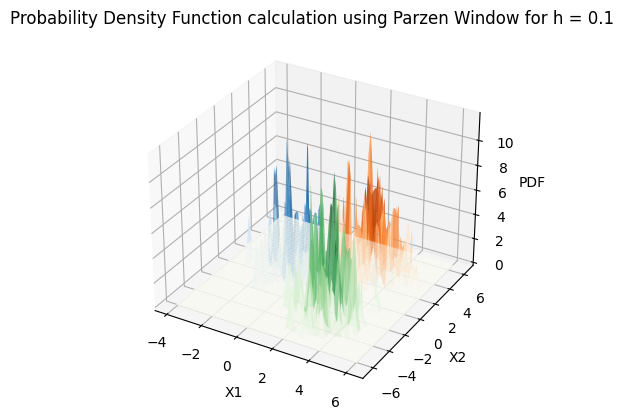

In [37]:
parzen_pdf_plot(class1_data,class2_data,class3_data,0.1)

In [38]:
#create a new dataset which has 75% less samples
def dataset_reduce(data,percentage):
  num_elements_to_remove = int(data.shape[0] * percentage)
  indices_to_remove = np.random.choice(data.shape[0], size=num_elements_to_remove, replace=False)
  new_data = np.delete(data, indices_to_remove,axis = 0)

  return new_data

#create new data
new_class1 = dataset_reduce(class1_data[:,0:2],0.75)
new_class2 = dataset_reduce(class2_data[:,0:2],0.75)
new_class3 = dataset_reduce(class3_data[:,0:2],0.75)

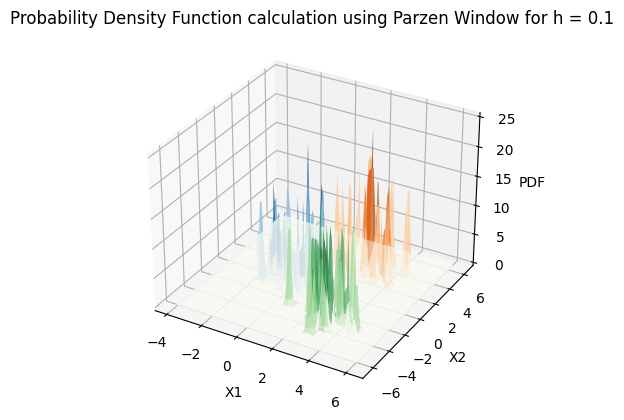

In [39]:
parzen_pdf_plot(new_class1,new_class2,new_class3,0.1)

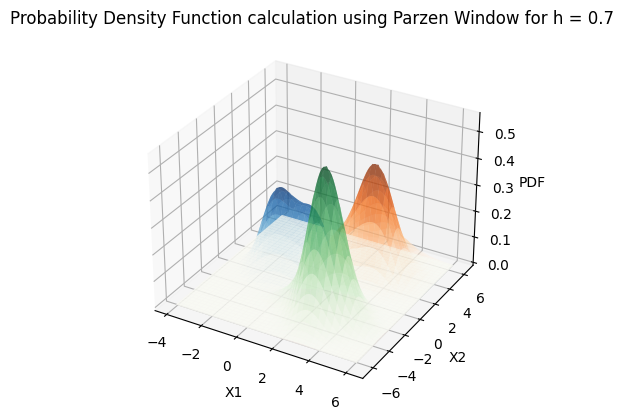

In [40]:
parzen_pdf_plot(new_class1,new_class2,new_class3,0.7)

##**Άσκηση 1 b)**

In [41]:
#implement KNN algorithm as described in course material
def KNN_algorithm(data,x,k):
  a = np.zeros([data.shape[0]])
  for i in range (data.shape[0]):
    a[i] = np.sqrt((data[i,0]-x[0])**2+(data[i,1]-x[1])**2)

  nearest_distances = []
  for i in range(k+1):
    nearest = np.argmin(a)
    nearest_dist = np.min(a)
    nearest_distances.append(nearest_dist)
    a[nearest] = np.inf

  nearest_distances = nearest_distances[1:]
  V = (np.pi)*(nearest_distances[-1]**2)
  pdf = k/(data.shape[0]*V)
  return pdf

In [42]:
def knn_pdf_plot(c1,c2,c3,k):
  #create a grid
  x1_min, x1_max = data[:, 0].min() - 1, data[:, 0].max() + 1
  x2_min, x2_max = data[:, 1].min() - 1, data[:, 1].max() + 1
  xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, 0.1),np.arange(x2_min, x2_max, 0.1))

  #use parzen window to calculate pdf for every grid point for every class
  grid_predictions1 = np.zeros_like(xx1)
  grid_predictions2 = np.zeros_like(xx1)
  grid_predictions3 = np.zeros_like(xx1)
  for i in range(xx1.shape[0]):
      for j in range(xx1.shape[1]):
          point = np.array([xx1[i, j], xx2[i, j]])
          grid_predictions1[i, j] = KNN_algorithm(c1[:, 0:2], point, k)
          grid_predictions2[i, j] = KNN_algorithm(c2[:, 0:2], point, k)
          grid_predictions3[i, j] = KNN_algorithm(c3[:, 0:2], point, k)

  #plot the pdfs
  fig = plt.figure()
  ax = fig.add_subplot(111, projection='3d')

  ax.plot_surface(xx1, xx2, grid_predictions1, cmap='Blues', alpha=0.5, label='Class 1')
  ax.plot_surface(xx1, xx2, grid_predictions2, cmap='Oranges', alpha=0.5, label='Class 2')
  ax.plot_surface(xx1, xx2, grid_predictions3, cmap='Greens', alpha=0.5, label='Class 3')

  ax.set_xlabel('X1')
  ax.set_ylabel('X2')
  ax.set_zlabel('PDF')
  ax.set_title(f'Probability Density Function calculation using KNN for k = {k}')
  plt.show()

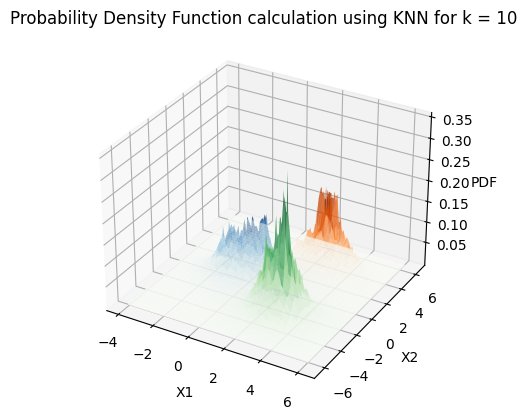

In [43]:
knn_pdf_plot(class1_data,class2_data,class3_data,10)

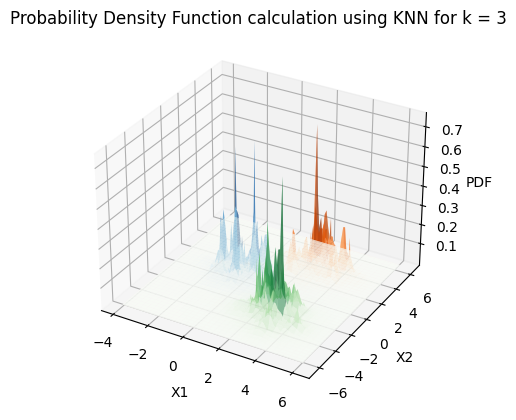

In [44]:
knn_pdf_plot(class1_data,class2_data,class3_data,3)

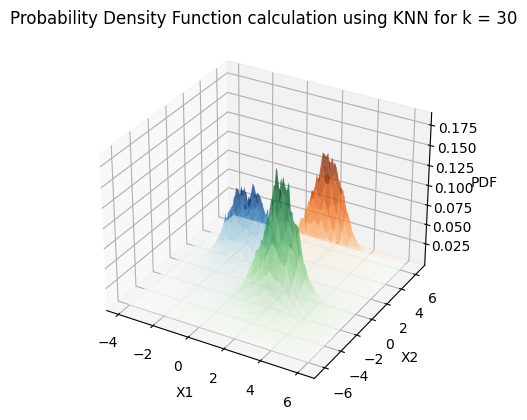

In [45]:
knn_pdf_plot(class1_data,class2_data,class3_data,30)

##**Άσκηση 1 c)**

In [46]:
data = np.genfromtxt(file_path, delimiter=',')

def parzen_plot_decision(data,h):
  #create a grid
  x_min, x_max = data[:, 0].min() - 3, data[:, 0].max() + 3
  y_min, y_max = data[:, 1].min() - 3, data[:, 1].max() + 3
  xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1), np.arange(y_min, y_max, 0.1))

  #find pdf for every point on the grid to separate regions
  Z = np.zeros_like(xx)
  for i in range(Z.shape[0]):
    for j in range(Z.shape[1]):
        point = np.array([xx[i, j], yy[i, j]])
        predictions = np.array([parzen_window(data[data[:, 2] == k, 0:2], h, point) for k in range(1, 4)])
        Z[i, j] = np.argmax(predictions)

  markers = ['o', 's', '^']

  #plot data from every class
  for class_idx in range(3):
    plt.scatter(data[data[:, 2] == class_idx + 1, 0],
                data[data[:, 2] == class_idx + 1, 1],
                label=f'Class {class_idx + 1}',
                marker=markers[class_idx], s=30)

  plt.contourf(xx, yy, Z, alpha=0.3, cmap='viridis')
  plt.xlabel('X1')
  plt.ylabel('X2')
  plt.title(f'Decision Boundaries with h = {h}')
  plt.legend()
  plt.show()

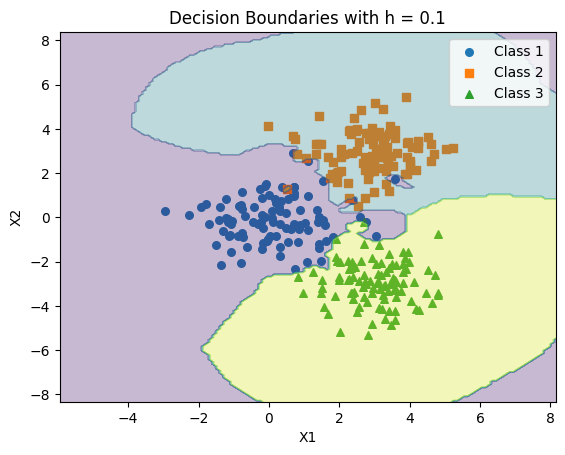

In [47]:
parzen_plot_decision(data,0.1)

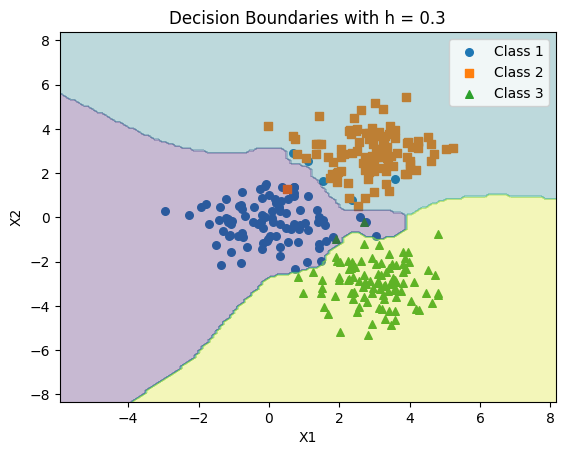

In [48]:
parzen_plot_decision(data,0.3)

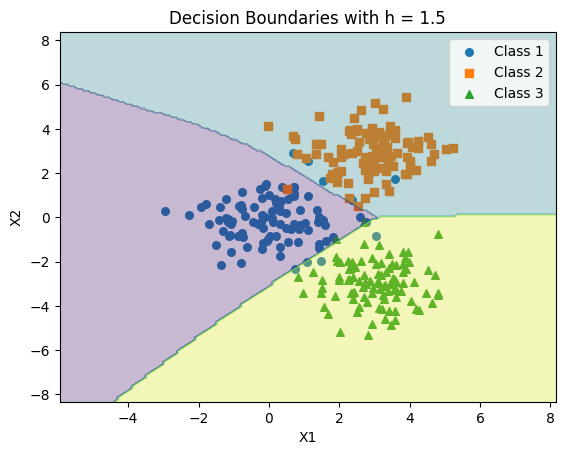

In [49]:
parzen_plot_decision(data,1.5)

##**Άσκηση 1 d)**

In [50]:
data = np.genfromtxt(file_path, delimiter=',')

def knn_plot_decision(data,k):
  #create a grid
  x_min, x_max = data[:, 0].min() - 3, data[:, 0].max() + 3
  y_min, y_max = data[:, 1].min() - 3, data[:, 1].max() + 3
  xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1), np.arange(y_min, y_max, 0.1))

  #find pdf for every point on the grid to separate regions
  Z = np.zeros_like(xx)
  for i in range(Z.shape[0]):
    for j in range(Z.shape[1]):
        point = np.array([xx[i, j], yy[i, j]])
        predictions = np.array([KNN_algorithm(data[data[:, 2] == t, 0:2], point, k) for t in range(1, 4)])
        Z[i, j] = np.argmax(predictions)

  markers = ['o', 's', '^']

  #plot data from every class
  for class_idx in range(3):
    plt.scatter(data[data[:, 2] == class_idx + 1, 0],
                data[data[:, 2] == class_idx + 1, 1],
                label=f'Class {class_idx + 1}',
                marker=markers[class_idx], s=30)

  plt.contourf(xx, yy, Z, alpha=0.3, cmap='viridis')
  plt.xlabel('X1')
  plt.ylabel('X2')
  plt.title(f'Decision Boundaries with k = {k}')
  plt.legend()
  plt.show()

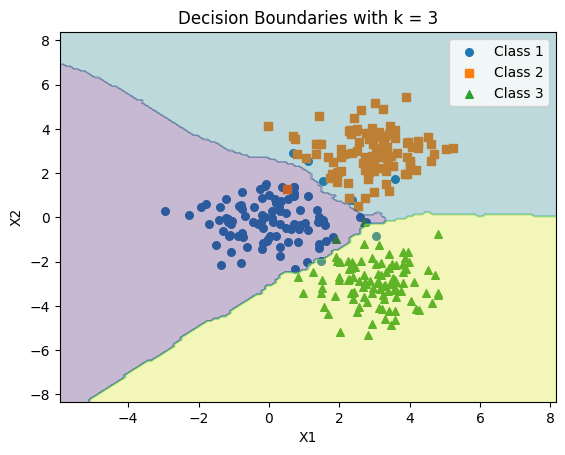

In [51]:
knn_plot_decision(data,3)

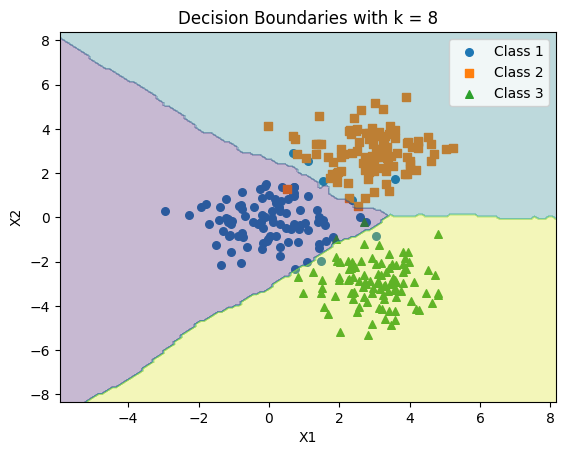

In [52]:
knn_plot_decision(data,8)

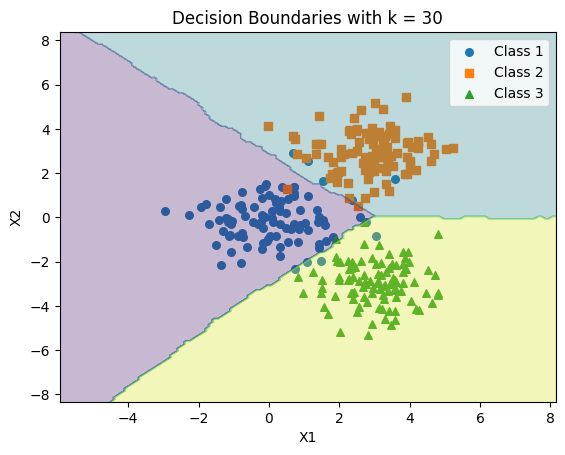

In [53]:
knn_plot_decision(data,30)

##**Άσκηση 2**

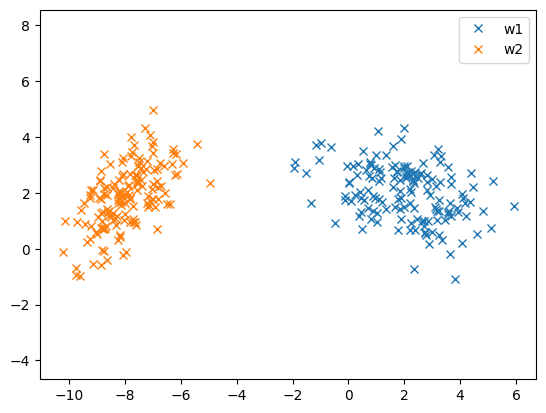

In [54]:
import numpy as np
import matplotlib.pyplot as plt

#create random seed for data generation
np.random.seed(39)

#create random samples using normal distribution
m1 = np.array([2,2])
s1 = np.array([[2,-0.5],[-0.5,1]])
m2 = np.array([-8,2])
s2 = np.array([[1,0.5],[0.5,1]])
w1 = np.random.multivariate_normal(m1,s1,150)
w2 = np.random.multivariate_normal(m2,s2,150)

#plot data for class w1 and w2
plt.plot(w1[:, 0], w1[:, 1], 'x', label='w1')
plt.plot(w2[:, 0], w2[:, 1], 'x', label='w2')
plt.legend()
plt.axis('equal')
plt.show()

#create an array with all data
data = np.vstack((w1,w2))

#create an array for labels
labels = np.hstack((np.ones(150),-1*np.ones(150)))

##**Άσκηση 2 a)**

In [55]:
#Based on MATLAB implementation from course material
def batch_perceptron(data,labels,initial_weights,learning_rate,epochs):
  x,y = data.shape
  w = np.hstack((initial_weights,1)) #weight augmentation to add bias
  iter = 0
  mis_clas = 1
  data = np.hstack((data, np.ones((data.shape[0],1)))) #data augmentation

  while iter < epochs and mis_clas > 0:
    iter = iter + 1
    mis_clas = 0
    gradi = np.zeros(y+1)

    for i in range(x):
      #check if the current sample is misclassified
      if(np.dot(data[i,:],w) * labels[i] < 0):
        mis_clas = mis_clas + 1 #increase misclassified counter
        gradi = gradi + learning_rate * (-labels[i]*data[i,:]) #update the gradient vector
    w = w - learning_rate * gradi #change the weight vector based on the gradient changes
  return w

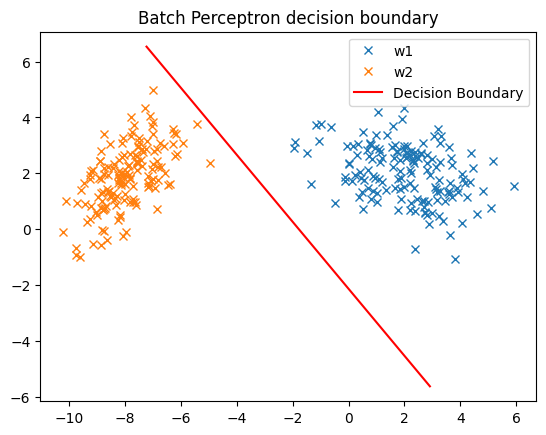

W values are: [0.55417091 0.46231063 0.99      ]


In [56]:
w = batch_perceptron(data,labels,np.array([0.5,0.5]),0.1,10000)
#data plot
plt.plot(w1[:, 0], w1[:, 1], 'x', label='w1')
plt.plot(w2[:, 0], w2[:, 1], 'x', label='w2')

#decision boundary plot
XL = [min(data[:, 0])+3, max(data[:, 0])-3]
YL = [(-w[2] - w[0] * x) / w[1] for x in XL]
plt.plot(XL, YL, color = 'red',label = 'Decision Boundary')

plt.title('Batch Perceptron decision boundary')
plt.legend()
plt.axis('equal')
plt.show()
print(f"W values are: {w}")

##**Άσκηση 2 b)**

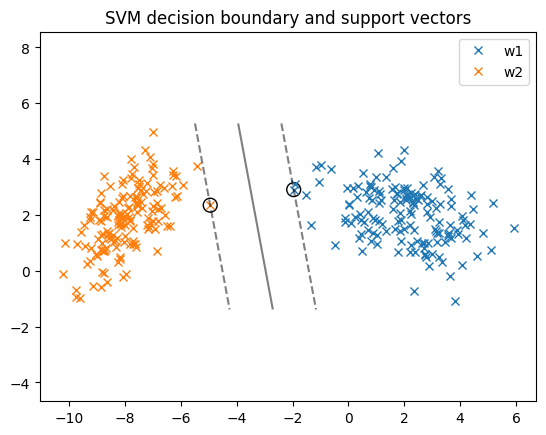

Support vectors are: [[-4.95100295  2.34975656]
 [-1.96116702  2.90695364]]


In [57]:
from sklearn import svm

#create and train a linear SVM
svm = svm.SVC(kernel='linear')
svm.fit(data, labels)
sup_vec = svm.support_vectors_

#plot data for class w1 and w2
plt.plot(w1[:, 0], w1[:, 1], 'x', label='w1')
plt.plot(w2[:, 0], w2[:, 1], 'x', label='w2')
plt.legend()

#get axis limits
ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()

#create a grid
xx, yy = np.meshgrid(np.linspace(xlim[0], xlim[1], 50), np.linspace(ylim[0], ylim[1], 50))

#compute decision boundary values
Z = svm.decision_function(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

#plot decision boundaries
plt.contour(xx, yy, Z, colors='k', levels=[-1, 0, 1], alpha=0.5, linestyles=['--', '-', '--'])
plt.title('SVM decision boundary and support vectors')

#plot support vectors
plt.scatter(sup_vec[:, 0], sup_vec[:, 1], s=100, facecolors='none', edgecolors='k')
plt.axis('equal')
plt.show()

#print support vectors
print(f"Support vectors are: {sup_vec}")

##**Άσκηση 3 a)**

In [58]:
import numpy as np
import math
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# Specify the file path
file_path1 = '/content/wine.data'

#store data on an array
data = np.genfromtxt(file_path1, delimiter=',')

#data seperation
class1_data = data[0:59,:]
class2_data = data[59:130,:]
class3_data = data[130:,:]

sub_class1 = class1_data[:,1:6]
sub_class2 = class2_data[:,1:6]
sub_class3 = class3_data[:,1:6]

#labels correspond to the data we will use
sub_labels = np.concatenate((class2_data[:,0],class3_data[:,0]),axis = 0)

#array with total data
tot_sub_class = np.concatenate((sub_class2,sub_class3), axis = 0)

#dataset split into train,validation and test set
#stratify argument ensures that every set contains same number of samples from each class
X_train, X_temp, y_train, y_temp = train_test_split(tot_sub_class, sub_labels, test_size=0.5, stratify=sub_labels,random_state=25)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, stratify=y_temp,random_state=25)

print(f"Train set shape: Data: {X_train.shape}, Labels: {y_train.shape}")
print(f"Validation set shape: Data: {X_val.shape}, Labels: {y_val.shape}")
print(f"Test set shape: Data: {X_test.shape}, Labels: {y_test.shape}")

Train set shape: Data: (59, 5), Labels: (59,)
Validation set shape: Data: (30, 5), Labels: (30,)
Test set shape: Data: (30, 5), Labels: (30,)


##**Άσκηση 3 b)**

In [59]:
from sklearn import svm
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

#create an linear SVM
svm_1 = svm.SVC(kernel='linear')

#define different values of c to find the best
c_val = {'C': [0.001, 0.01, 0.1, 1, 10, 100,1000]}

#search for the best c value in validation set
grid_search = GridSearchCV(svm_1, c_val)
grid_search.fit(X_val, y_val)

#define the best c found
best_C = grid_search.best_params_['C']

#use the best c to train the model in training set
svm_2 = svm.SVC(kernel='linear', C=best_C)
svm_2.fit(X_train,y_train)

#use the model to predict in test set
y_pred = svm_2.predict(X_test)

#model accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy on the test set is: {accuracy} so error is {1-accuracy}")

Accuracy on the test set is: 0.9333333333333333 so error is 0.06666666666666665


##**Άσκηση 3 c)**

In [64]:
from sklearn import svm
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

class_error = []
for i in range(5):
  #split data randomly every time
  X_train, X_temp, y_train, y_temp = train_test_split(tot_sub_class, sub_labels, test_size=0.5, stratify=sub_labels)
  X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, stratify=y_temp)

  svm_1 = svm.SVC(kernel='linear')

  #define different values of c to find the best
  c_val = {'C': [0.001, 0.01, 0.1, 1, 10, 100,1000]}

  #search for the best c value in validation set
  grid_search = GridSearchCV(svm_1, c_val)
  grid_search.fit(X_val, y_val)

  #define the best c found
  best_C = grid_search.best_params_['C']

  #use the best c to train the model in training set
  svm_2 = svm.SVC(kernel='linear', C=best_C)
  svm_2.fit(X_train,y_train)

  #use the model to predict in test set
  y_pred = svm_2.predict(X_test)

  #model accuracy
  accuracy = accuracy_score(y_test, y_pred)
  class_error.append(round(1 - accuracy,3))

print(f"Classification error in each case is: {class_error}")
#calculate mean value for error and standard deviation of errors
mean_error = np.mean(class_error)
std_error = np.std(class_error)
print(f"Mean classification error: {mean_error}")
print(f"Standard deviation of classification errors: {std_error}")

Classification error in each case is: [0.178, 0.133, 0.222, 0.267, 0.289]
Mean classification error: 0.2178
Standard deviation of classification errors: 0.057066277257238354


##**Άσκηση 3 d)**

In [72]:
from sklearn import svm
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

class_error = np.zeros((4,5))

#define kernel functions in order run with different every time
kernel_funcs = ['poly','rbf','sigmoid','linear']

#use in every iteration the same data for all the kernels
for i in range(5):
  #split data randomly every time
  X_train, X_temp, y_train, y_temp = train_test_split(tot_sub_class, sub_labels, test_size=0.5, stratify=sub_labels)
  X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, stratify=y_temp)
  cnt1 = 0
  for k in kernel_funcs:
    svm_1 = svm.SVC(kernel=k)

    #define different values of c to find the best
    c_val = {'C': [0.001, 0.01, 0.1, 1, 10, 100,1000]}

    #search for the best c value in the validation set
    grid_search = GridSearchCV(svm_1, c_val)
    grid_search.fit(X_val, y_val)

    #define the best c found
    best_C = grid_search.best_params_['C']

    #use the best c to train the model in training set
    svm_2 = svm.SVC(kernel=k, C=best_C)
    svm_2.fit(X_train,y_train)

    #use the model to predict in test set
    y_pred = svm_2.predict(X_test)

    #model accuracy
    accuracy = accuracy_score(y_test, y_pred)
    class_error[cnt1,i] = 1 - accuracy

    cnt1 += 1

#print classification error, mean value for error and standard deviation of errors
cnt2 = 0
for i in kernel_funcs:
  print(f"\nUsing {i} kernel:\n")
  print(f"Classification error in each case is: {class_error[cnt2,:]}")
  mean_error = np.mean(class_error[cnt2,:])
  std_error = np.std(class_error[cnt2,:])
  print(f"Mean classification error: {mean_error}")
  print(f"Standard deviation of classification errors: {std_error}")
  cnt2 += 1


Using poly kernel:

Classification error in each case is: [0.2        0.17777778 0.13333333 0.15555556 0.13333333]
Mean classification error: 0.15999999999999998
Standard deviation of classification errors: 0.025915341754868006

Using rbf kernel:

Classification error in each case is: [0.24444444 0.26666667 0.13333333 0.11111111 0.15555556]
Mean classification error: 0.18222222222222223
Standard deviation of classification errors: 0.061903947898596094

Using sigmoid kernel:

Classification error in each case is: [0.6 0.6 0.6 0.6 0.6]
Mean classification error: 0.6
Standard deviation of classification errors: 0.0

Using linear kernel:

Classification error in each case is: [0.2        0.26666667 0.2        0.15555556 0.13333333]
Mean classification error: 0.1911111111111111
Standard deviation of classification errors: 0.045758356182164464


##**Άσκηση 3 e)**

Mean error: 0.1852380952380953


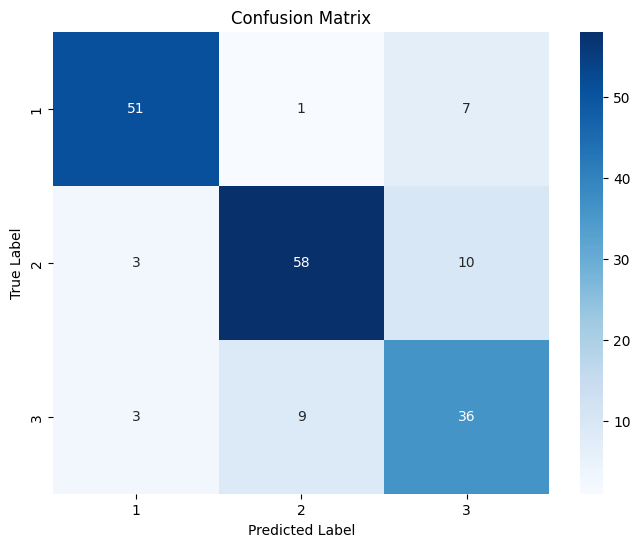

In [62]:
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.metrics import confusion_matrix
import seaborn as sns
#for the first 5 characteristics for all classes

data = np.genfromtxt(file_path1, delimiter=',')

#change the dataset to include only the required characteristics
class1_data = data[0:59, :]
class2_data = data[59:130, :]
class3_data = data[130:, :]

sub_class1 = class1_data[:, 1:6]
sub_class2 = class2_data[:, 1:6]
sub_class3 = class3_data[:, 1:6]

sub_labels = np.concatenate((class1_data[:, 0], class2_data[:, 0], class3_data[:, 0]), axis=0)

tot_sub_class = np.concatenate((sub_class1, sub_class2, sub_class3), axis=0)

#create a linear svm classifier with C = 1 and choose one vs one decision function
#with argument value 'ovo'
svm = svm.SVC(kernel='linear', C=1, decision_function_shape='ovo')

#5 fold cross validation to find accuracy
cv_scores = cross_val_score(svm, tot_sub_class, sub_labels, cv = 5, scoring='accuracy')

mean_error = 1 - np.mean(cv_scores)
print("Mean error:", mean_error)

#using 5 fold cross validation protocol to predict the labels
predicted_labels = cross_val_predict(svm, tot_sub_class, sub_labels, cv=5)

#calculate confusion matrix using labels and predicted labels
conf_matrix = confusion_matrix(sub_labels, predicted_labels)

#plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=[1, 2, 3], yticklabels=[1, 2, 3])
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

Mean error: 0.03888888888888897


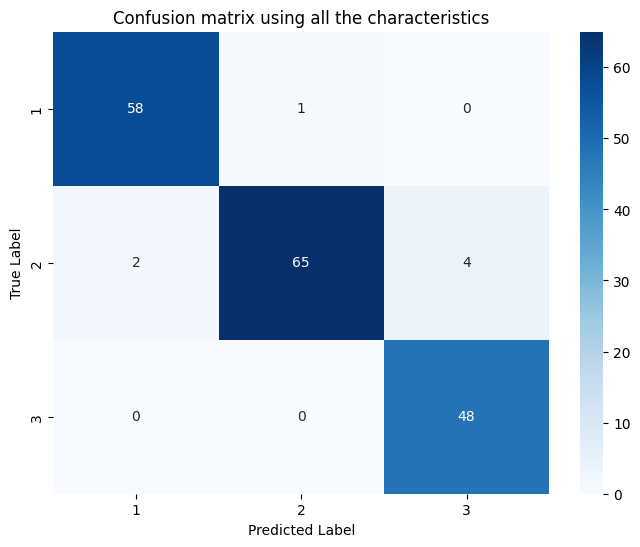

In [63]:
from sklearn import svm
#using all characteristics for the 3 classes
data = np.genfromtxt(file_path1, delimiter=',')

#create a linear svm classifier with C = 1 and choose one vs one decision function
svm = svm.SVC(kernel='linear', C=1, decision_function_shape='ovo')

#5 fold cross validation to find accuracy
cv_scores = cross_val_score(svm, data[:,1:], data[:,0], cv = 5, scoring='accuracy')

mean_error = 1 - np.mean(cv_scores)
print("Mean error:", mean_error)

#using 5 fold cross validation protocol to predict based on data
predicted_labels = cross_val_predict(svm, data[:,1:], data[:,0], cv=5)

#calculate confusion matrix using labels and predicted labels
conf_matrix = confusion_matrix(data[:,0], predicted_labels)

#plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=[1, 2, 3], yticklabels=[1, 2, 3])
plt.title("Confusion matrix using all the characteristics")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()